In [1]:
from PyHugeGraph import PyHugeGraphClient
from helper.insert_data import insert_data
from helper.delete_data import delete_data
from helper.update_data import update_data
from helper.traversers import traversers
from helper.read_data import read_data
import matplotlib.pyplot as plt
import numpy as np

from helper import get_vertices_number

def mapping(l, key_1, key_2):
    return list(map(lambda x: x[key_1][key_2], l))


databases = ['node_10', 'node_100', 'node_1000'] # , 'node_10000', 'node_100000', 'node_1000000']

In [2]:

import os
my_path = os.path.abspath(".")
print(my_path)

/home/thodoris/Documents/HugeGraph/CompareGraphDatabases/main_code


In [3]:
def plot(title, x_labels, X_axis, time, option="vertices", database="node_10"):
    plt.figure(figsize=(10,10))
    plt.title(title)

    plt.xticks(X_axis, x_labels) #, rotation=45
    plt.bar(X_axis - 0.4, mapping(time, option, "min"), 0.4, label="min")
    plt.bar(X_axis, mapping(time, option, "mean"), 0.4, label="mean")
    plt.bar(X_axis + 0.4, mapping(time, option, "max"), 0.4, label="max")
    
    plt.savefig(my_path + "/plots/" + database + "/" + title + ".png")
    plt.legend()


In [4]:
def execute_database(database, large=True):
    hg = PyHugeGraphClient.HugeGraphClient("http://localhost", "8081", database)
    
    vertices = get_vertices_number(database, False)

    file = open(database + ".txt", 'r')
    lines = file.readlines()
    time = []

    if not large:
        time.append(insert_data.insert_data(lines, hg))
        time.append(update_data.update_data(hg, vertices))
        time.append(update_data.update_gremlin(database, vertices))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=vertices))
        time.append(read_data.read_gremlin(database, vertices, True))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=vertices))
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200))
        time.append(delete_data.delete_gremlin_alltogether(database, vertices))
            
        x_labels = ["insert", "update", "upd_gremlin", "batch_upd", "read", "rd_gremlin", "delete", "batch_insert", "del_gremlin"]
    else:
        time.append(insert_data.batch_insert(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200))
        time.append(update_data.batch_update(hg=hg, lines=lines, NUMBER_OF_VERTICES=vertices, batch_vertices=200, batch_edges=200, percentage=None))
        time.append(read_data.read_data(hg=hg, NUMBER_OF_VERTICES=1000))
        time.append(delete_data.delete_data(hg=hg, NUMBER_OF_vertices=1000))
        x_labels = ["batch_insert", "batch_update", "read", "delete"]

    X_axis = np.arange(len(x_labels))*2

    plot("Basic sequence on " + database + ": Vertices", x_labels, X_axis, time, "vertices", database)
    plot("Basic sequence on " + database + ": Edges", x_labels, X_axis, time, "edges", database)

    if not large:
        x_labels = ["insert", "batch insert"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[0], time[7]]
        plot("Insert times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Insert times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["read", "rd_gremlin"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[4], time[5]]
        plot("Read times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Read times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["update", "upd_gremlin", "batch_upd"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[1], time[2], time[3]]
        plot("Update times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Update times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)

        x_labels = ["delete", "del_gremlin"]
        X_axis = np.arange(len(x_labels))*2
        data = [time[6], time[8]]
        plot("Delete times on " + database + ": Vertices", x_labels, X_axis, data, "vertices", database)
        plot("Delete times on " + database + ": Edges", x_labels, X_axis, data, "edges", database)
    
    plt.show()
    if not large:
        return {
            "insert": time[0],
            "update": time[1],
            "update_gremlin": time[2],
            "batch_update": time[3],
            "read": time[4],
            "read_gremlin": time[5],
            "delete": time[6],
            "batch_insert": time[7],
            "delete_gremlin": time[8],
        }
    else:
        return {
            "batch insert": time[0],
            "batch update": time[1],
            "read": time[2],
            "delete": time[3],
        }

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 271.05it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 270.64it/s]


length = 32


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 49.98it/s]


{'requestId': '55e9c95c-1d37-4395-8070-219c37f47593', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


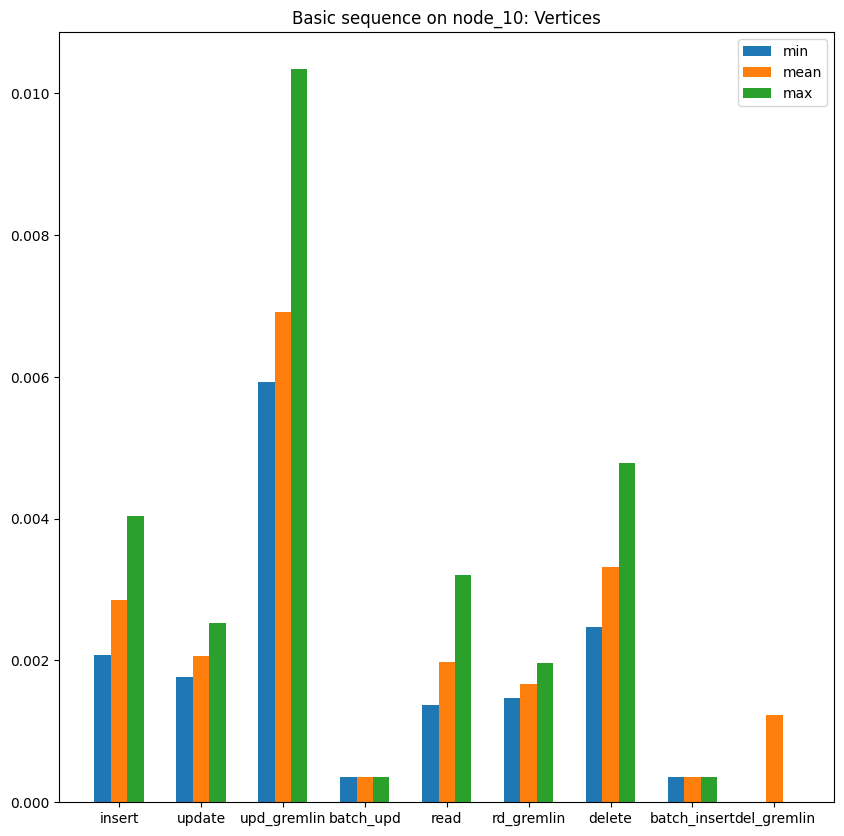

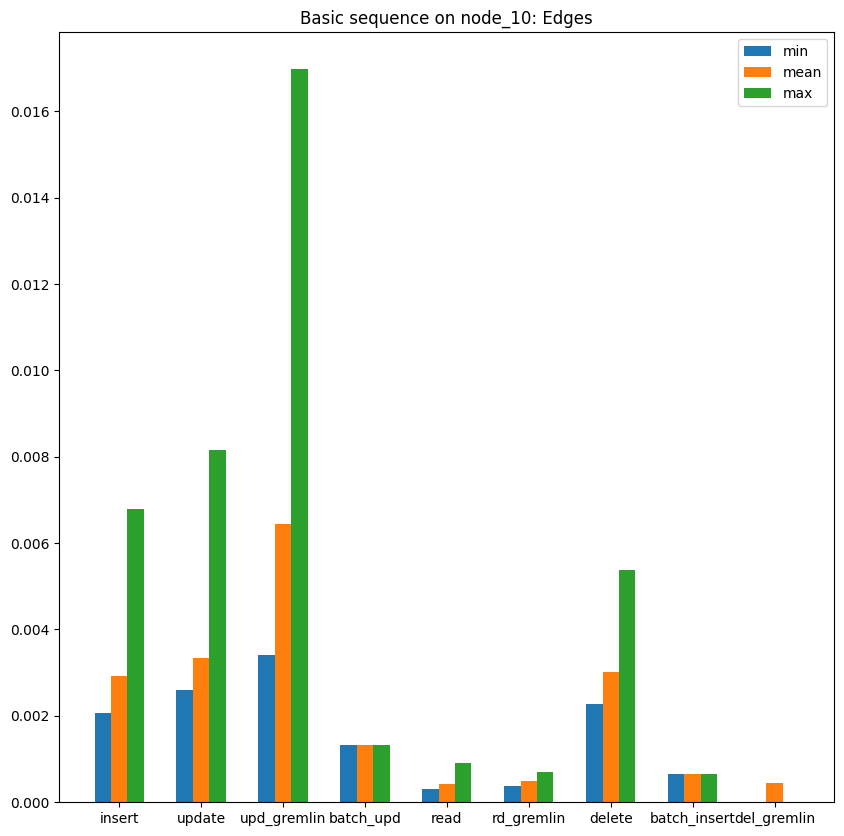

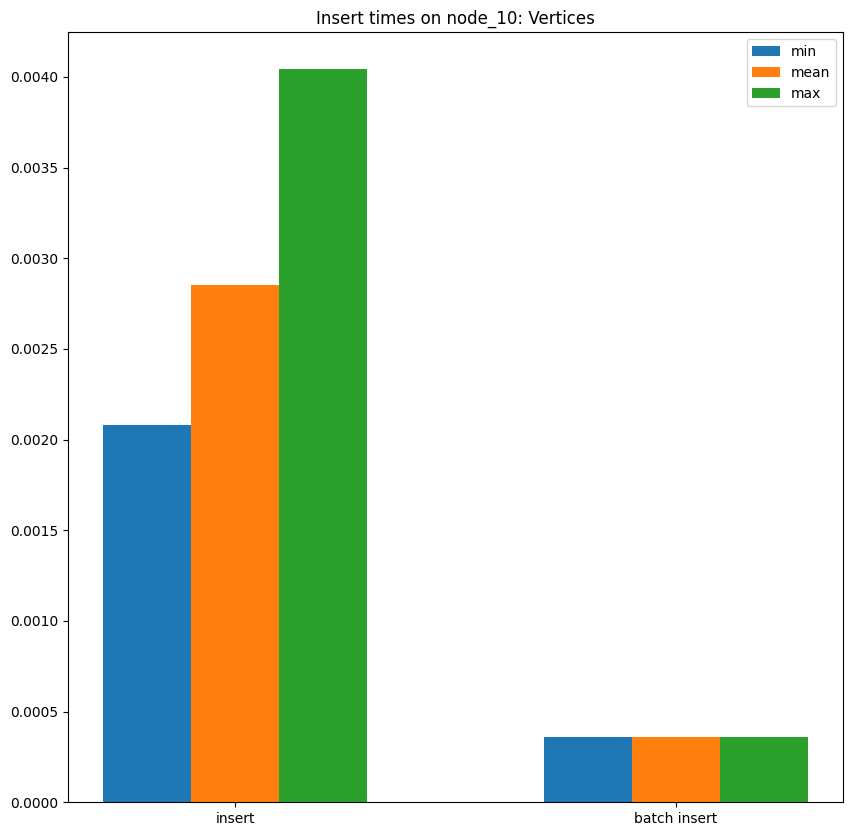

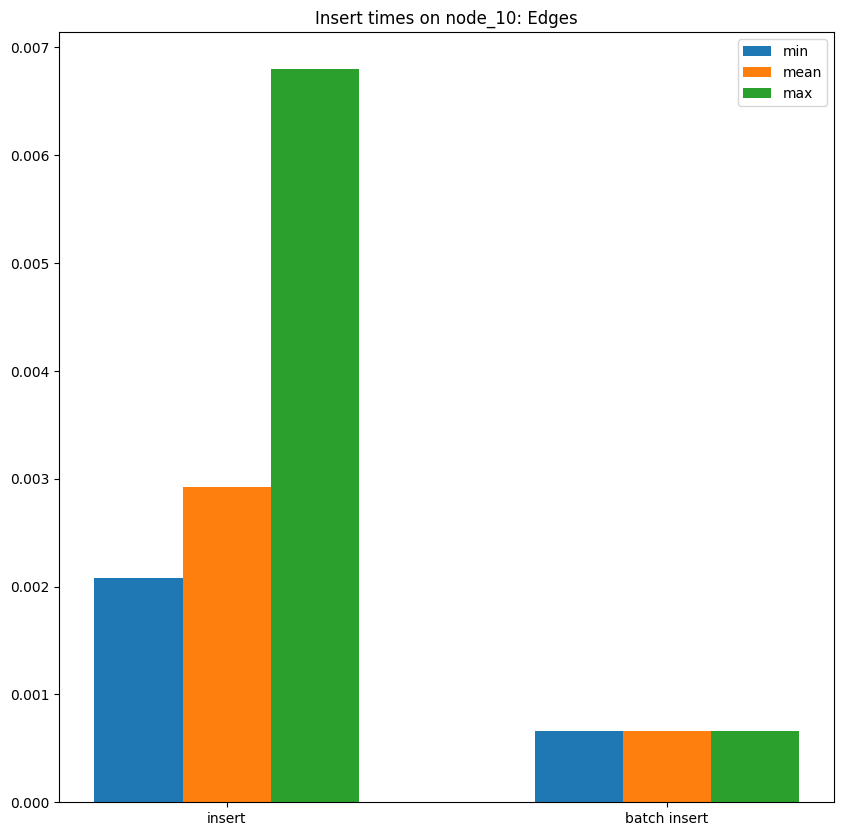

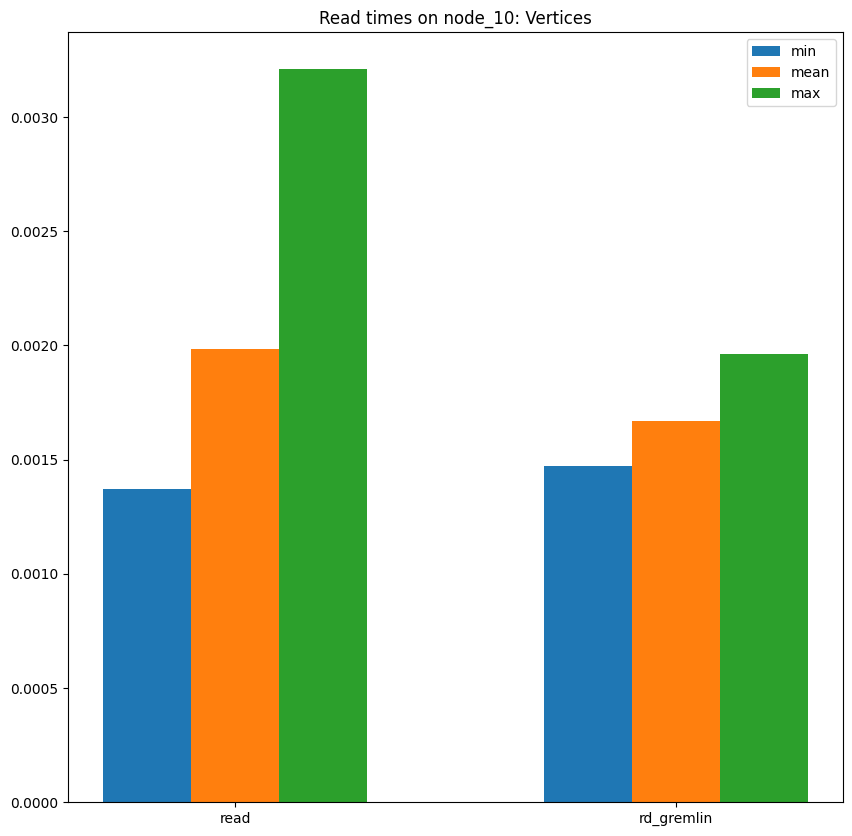

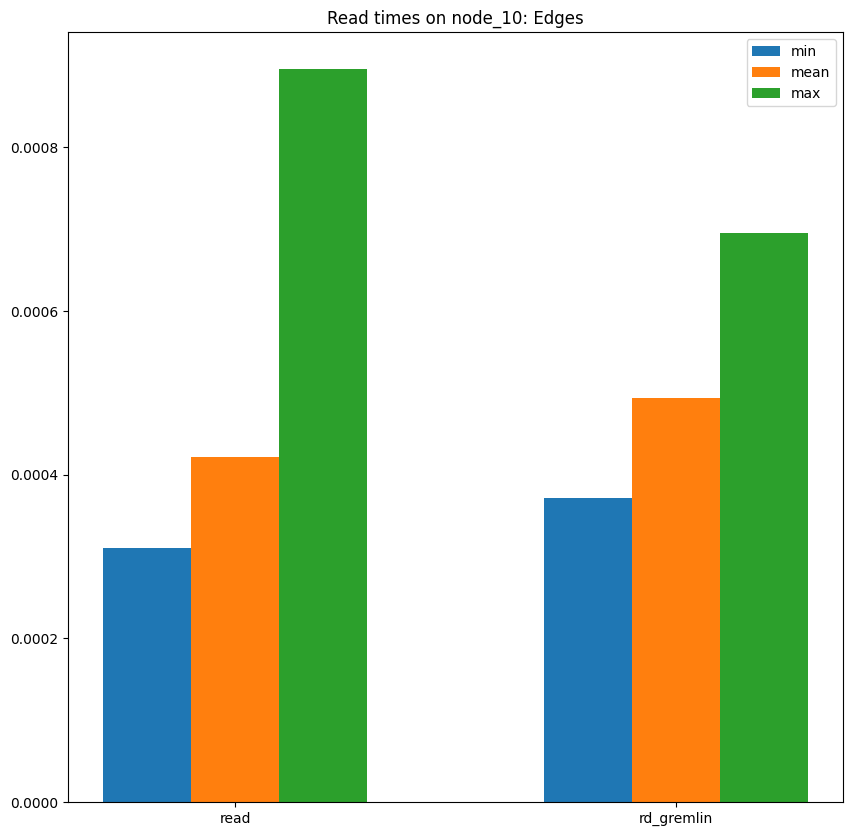

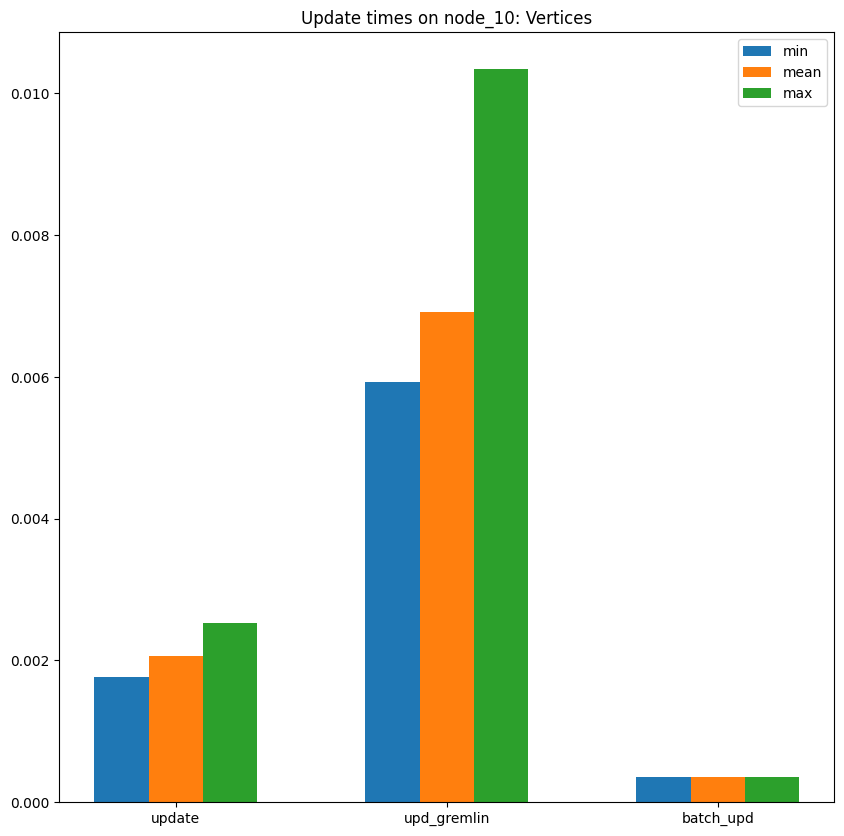

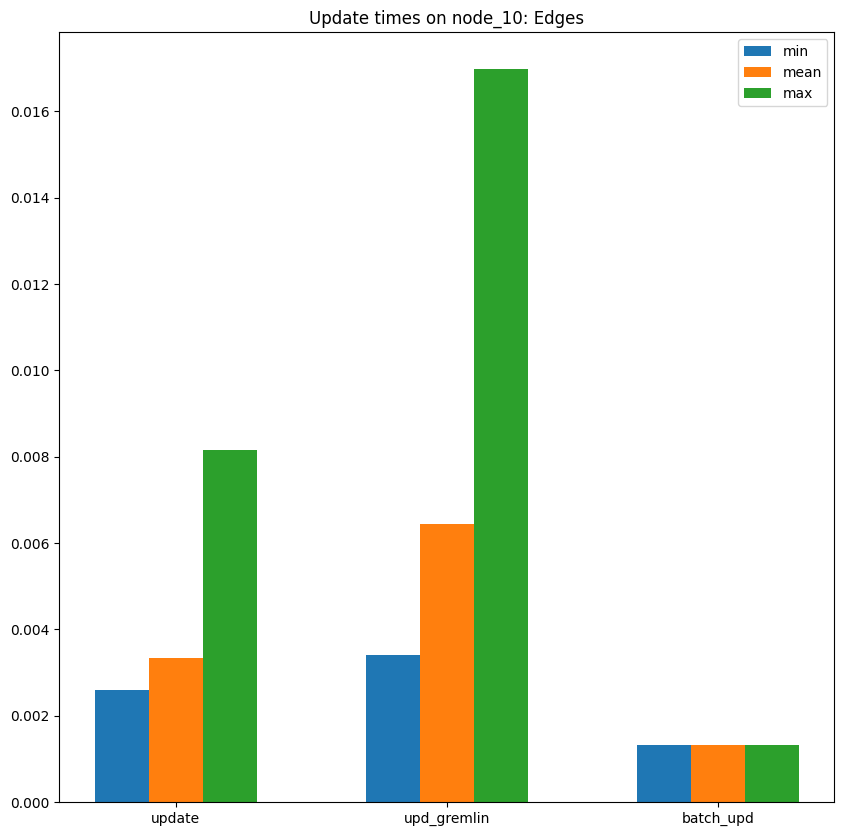

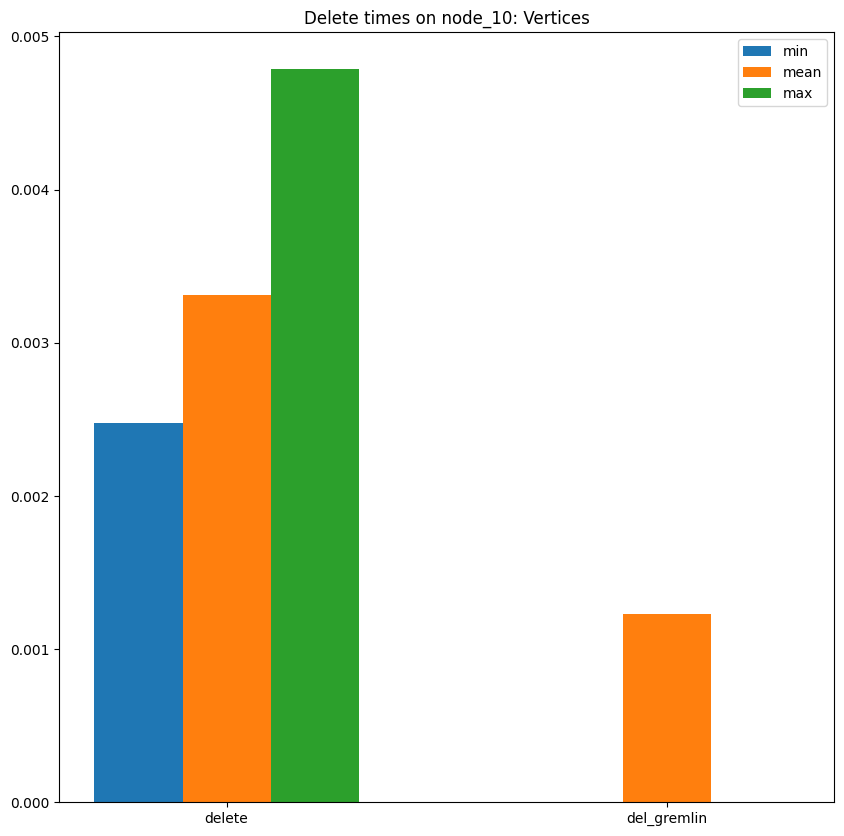

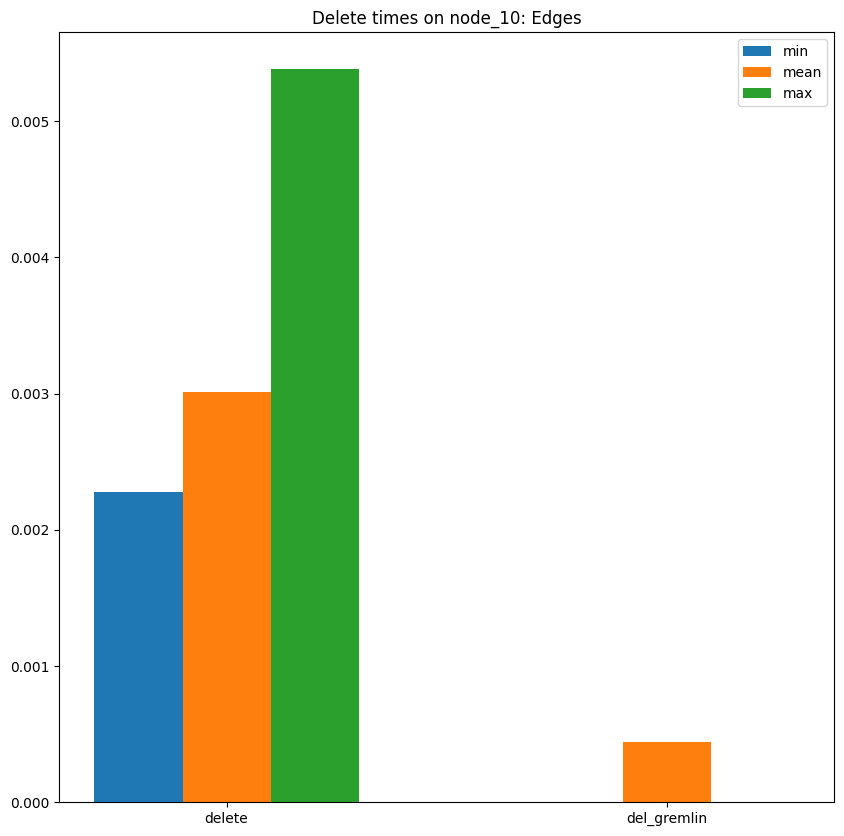

tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 69.56it/s]


length = 600


tqdm() Progress Bar: 100%|██████████| 1/1 [00:00<00:00, 93.65it/s]


length = 600


tqdm() Progress Bar: 100%|██████████| 3/3 [00:00<00:00,  9.32it/s]


{'requestId': '225070e2-40b8-48d3-9d8d-1932ed82bfca', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


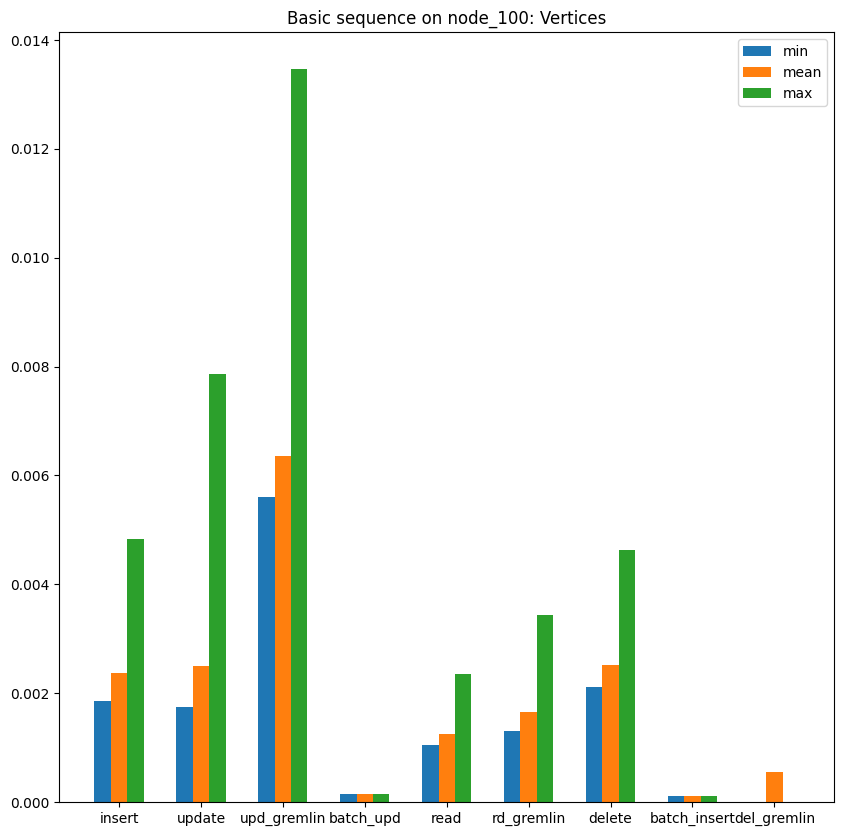

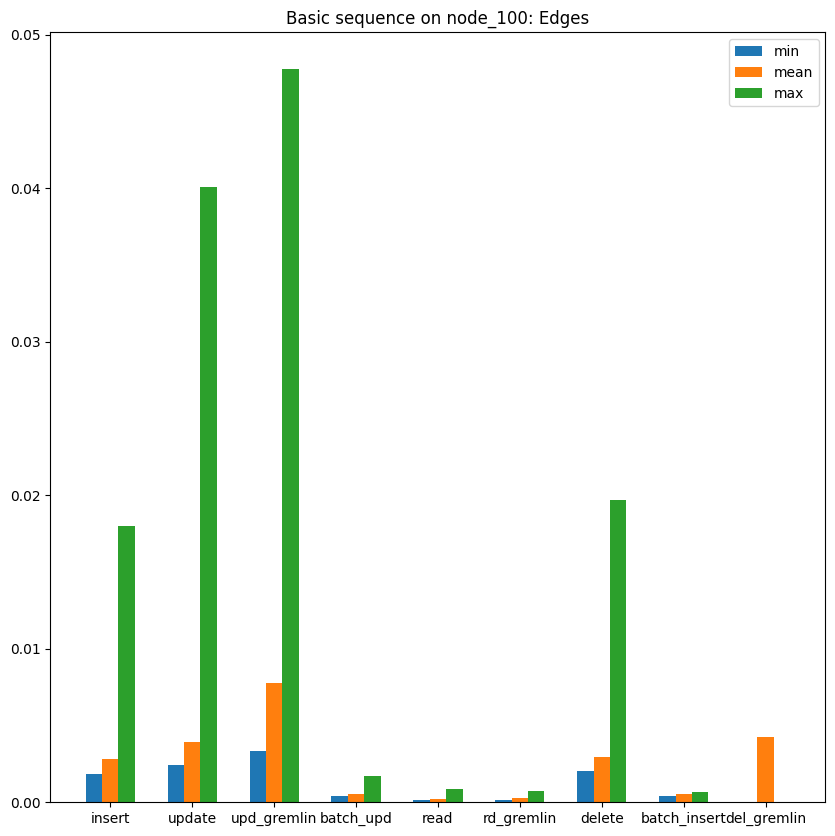

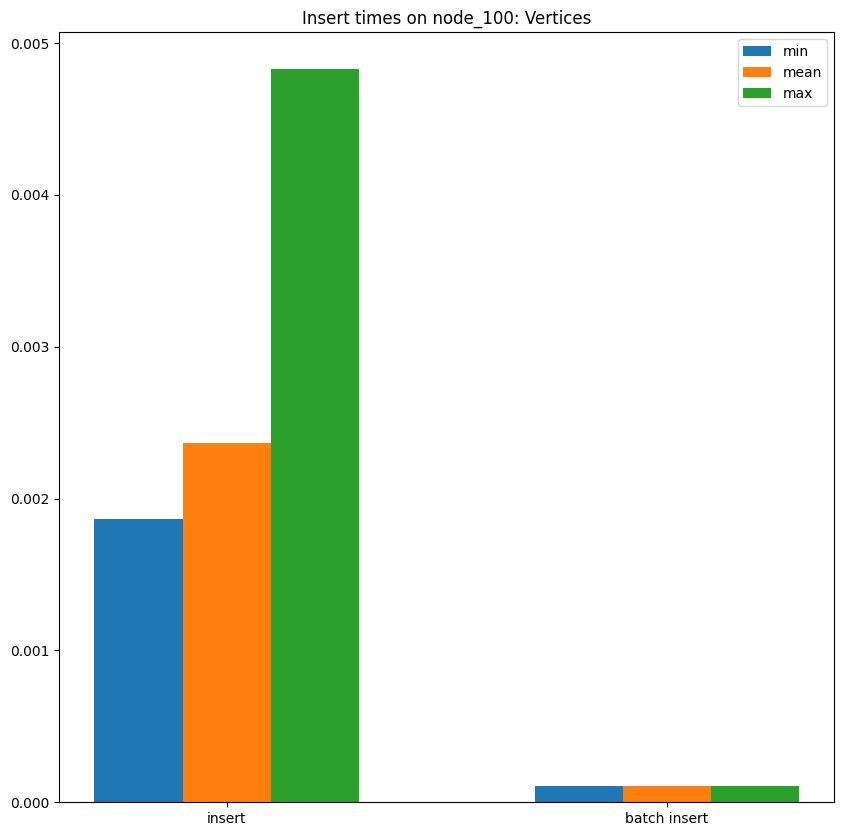

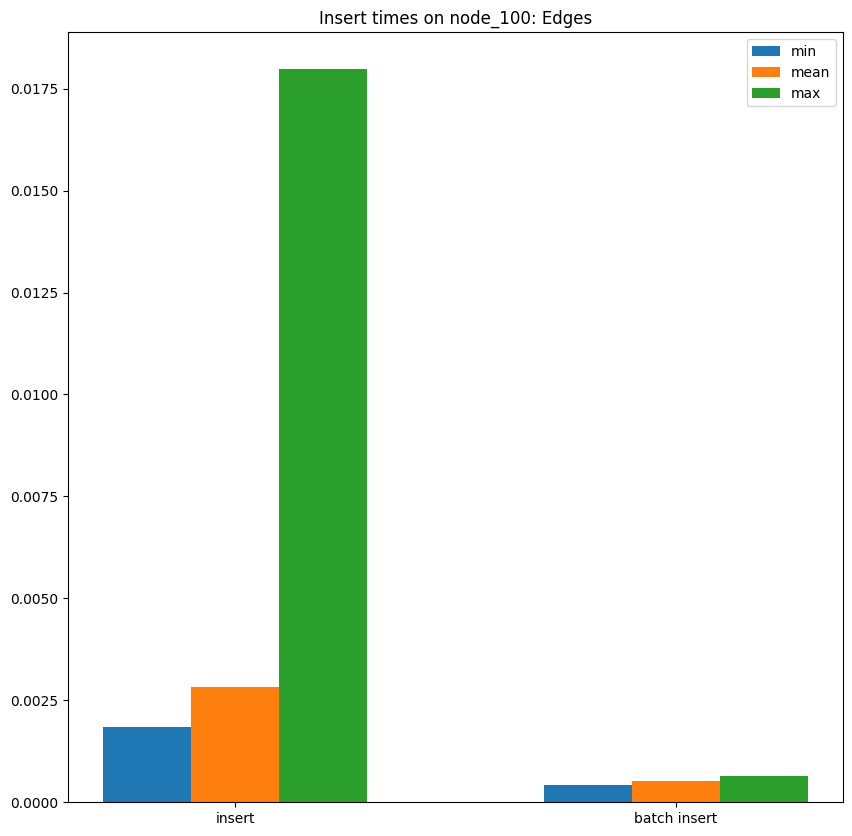

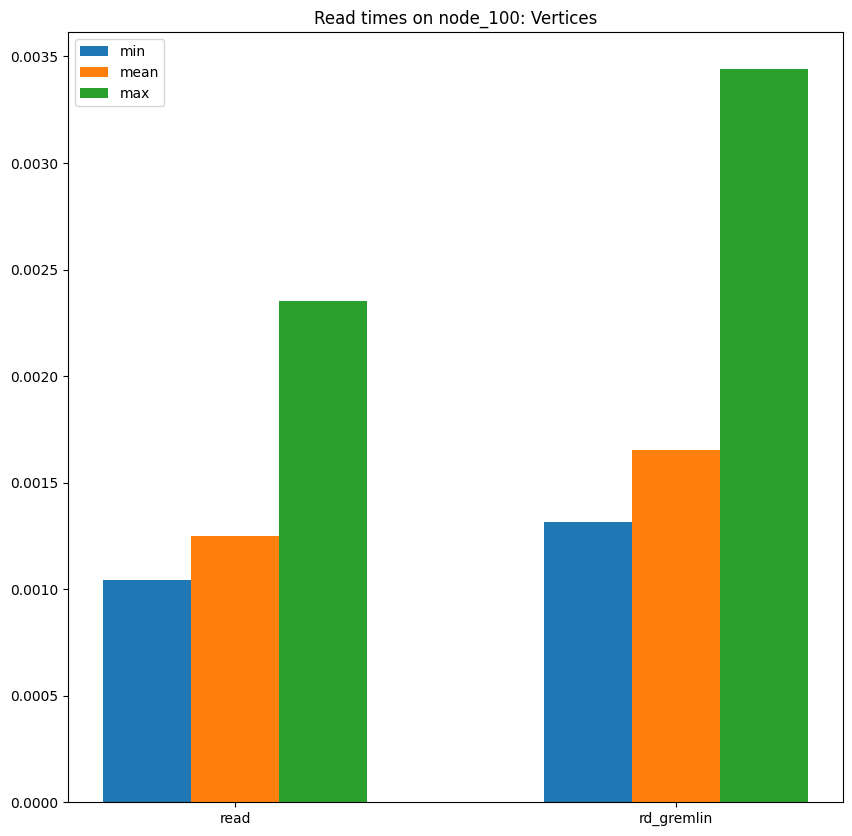

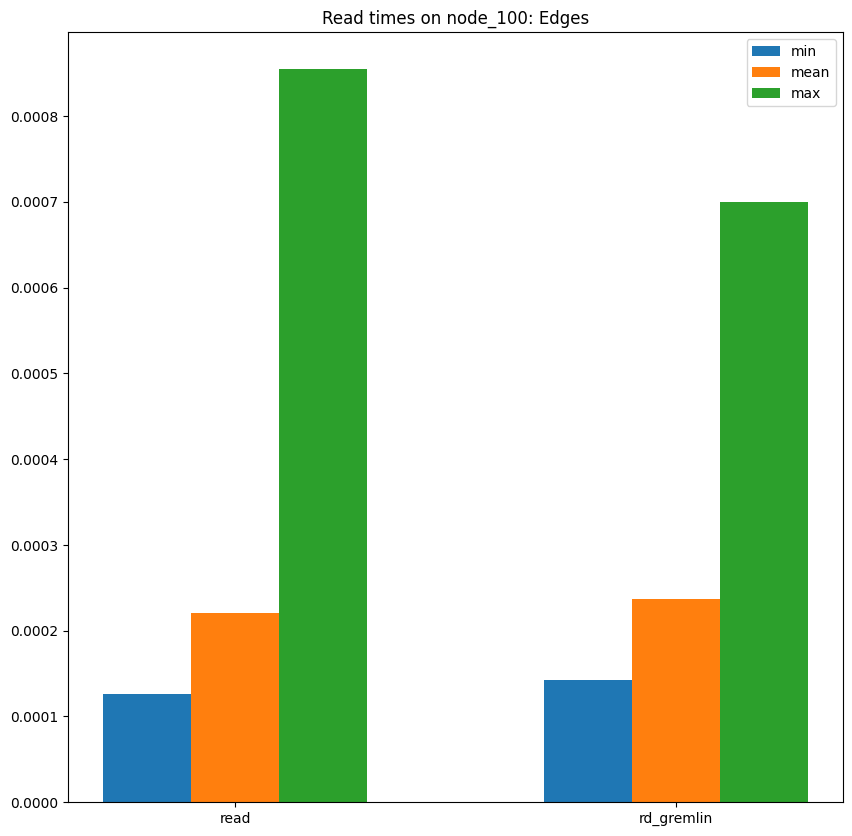

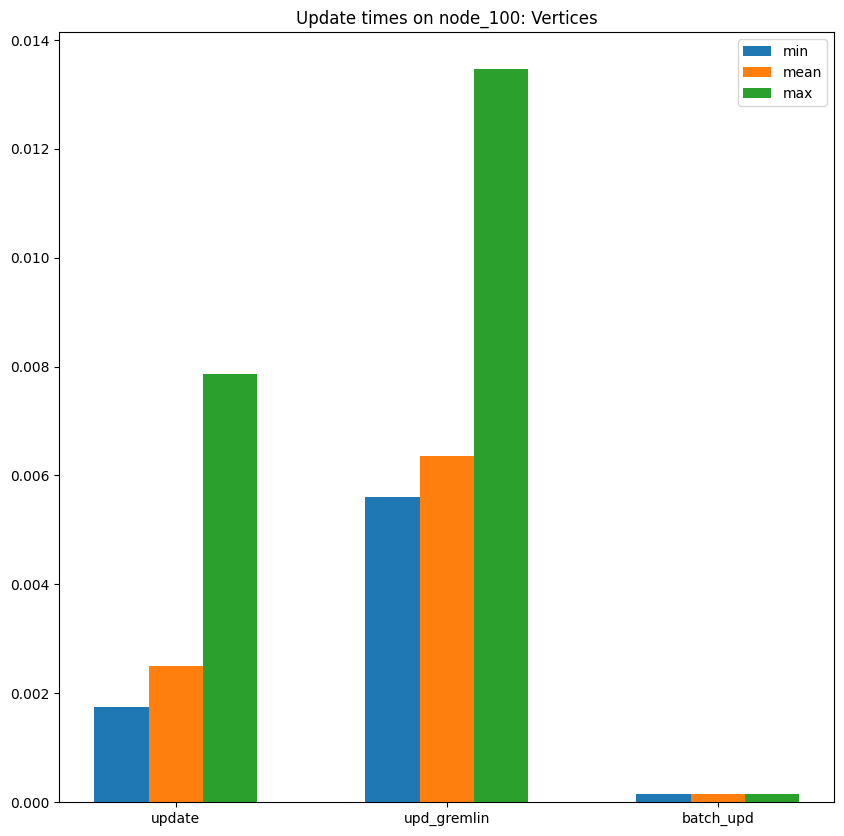

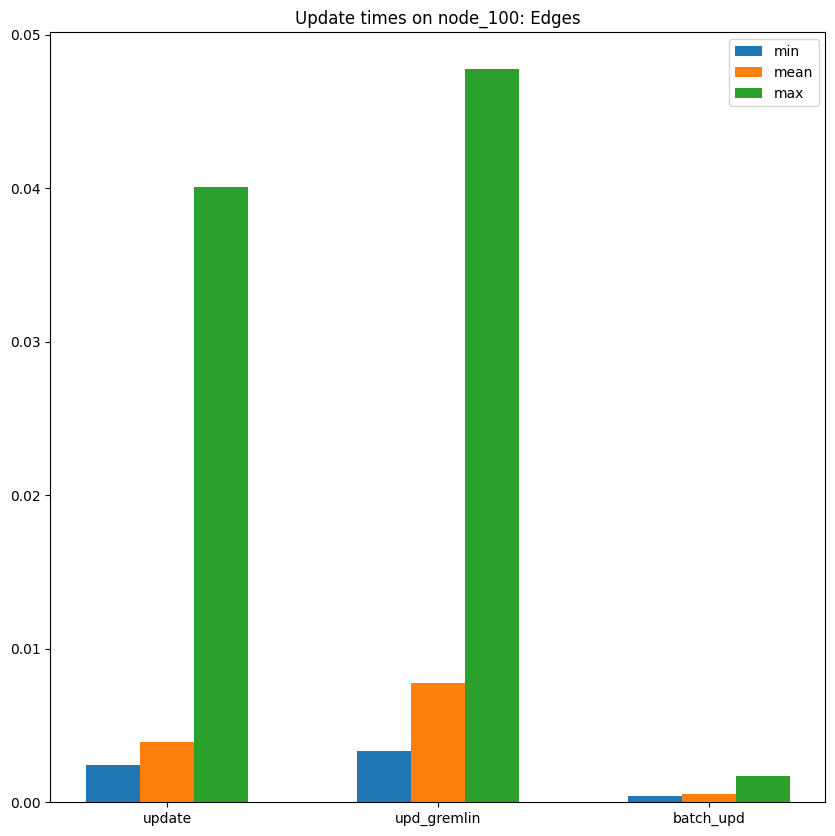

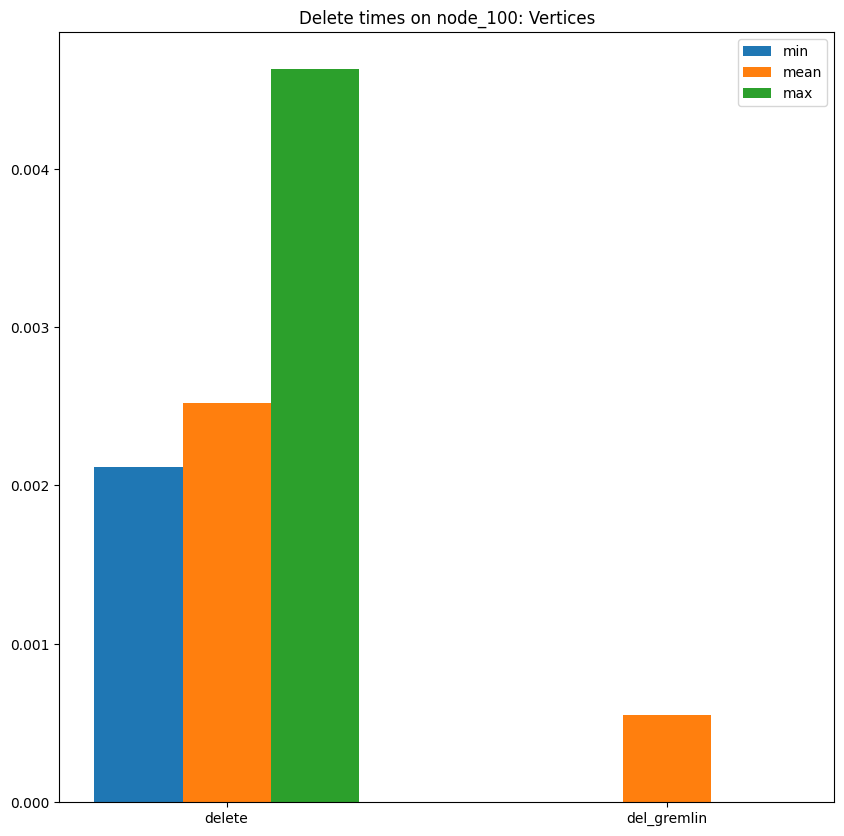

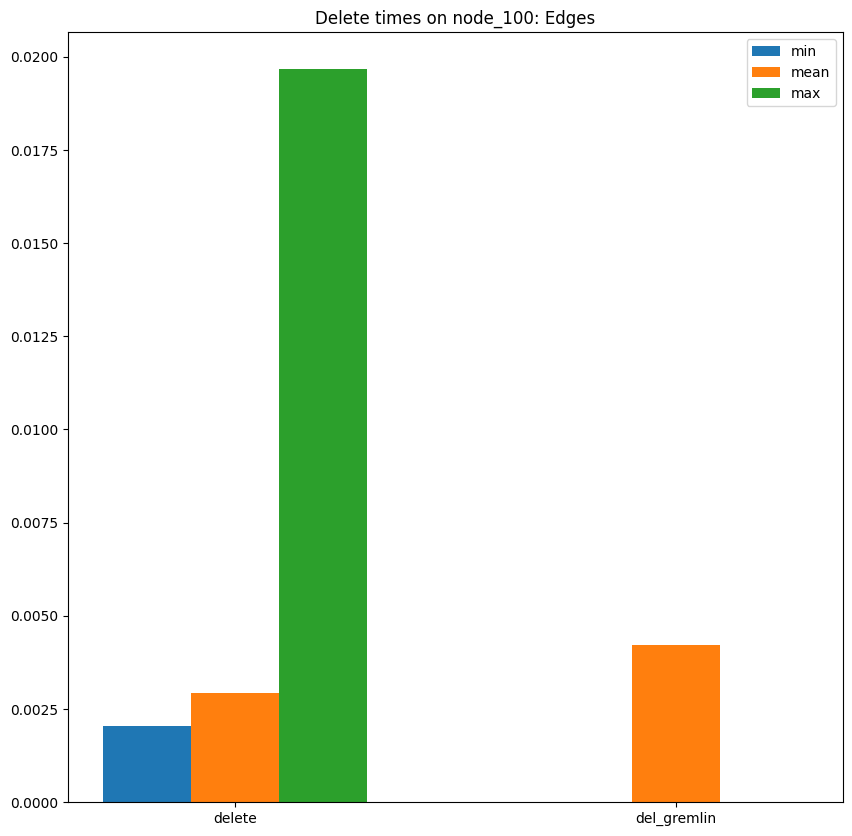

tqdm() Progress Bar: 100%|██████████| 5/5 [00:00<00:00, 29.59it/s]


length = 59589


tqdm() Progress Bar: 100%|██████████| 5/5 [00:00<00:00, 32.57it/s]


length = 59589


tqdm() Progress Bar: 100%|██████████| 298/298 [00:30<00:00,  9.66it/s]


{'requestId': 'c93b0de2-e140-49d5-a288-83cf6deec04b', 'status': {'message': '', 'code': 200, 'attributes': {}}, 'result': {'data': [], 'meta': {}}}


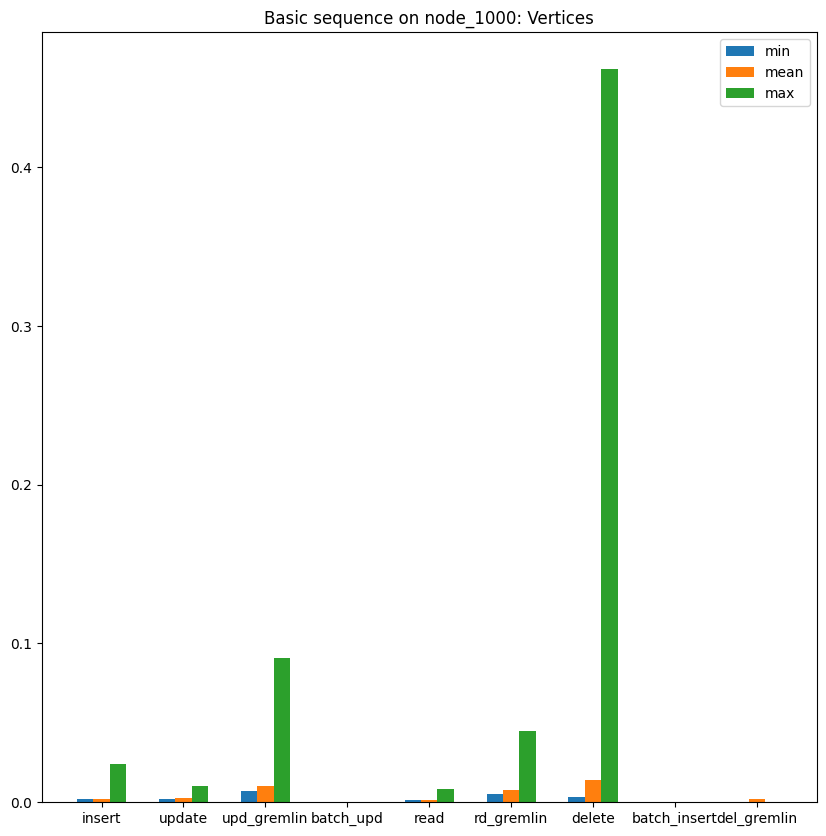

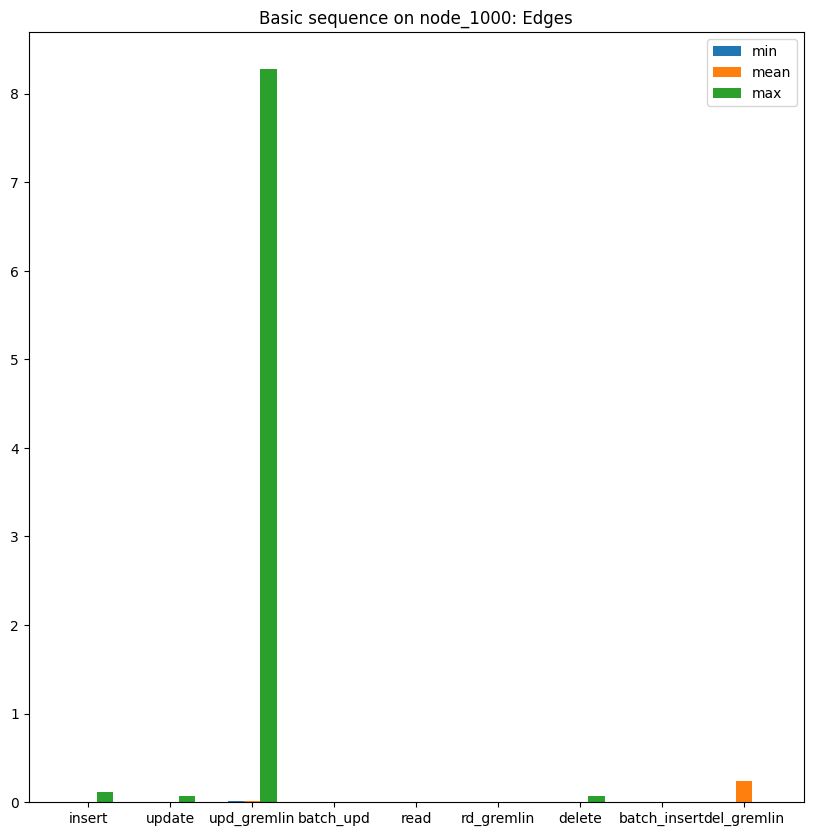

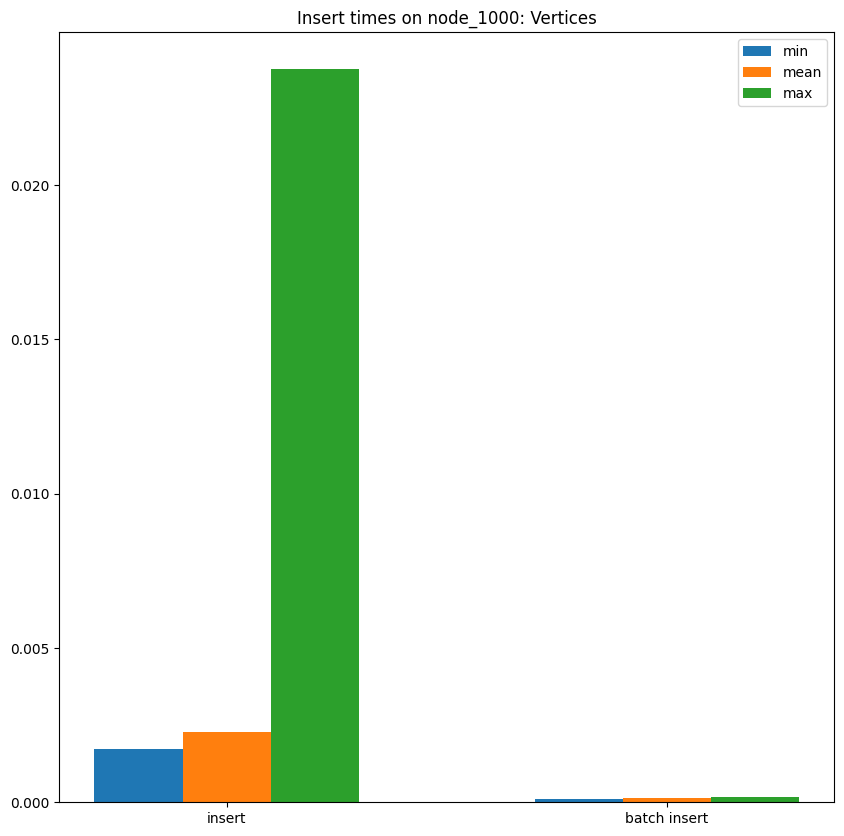

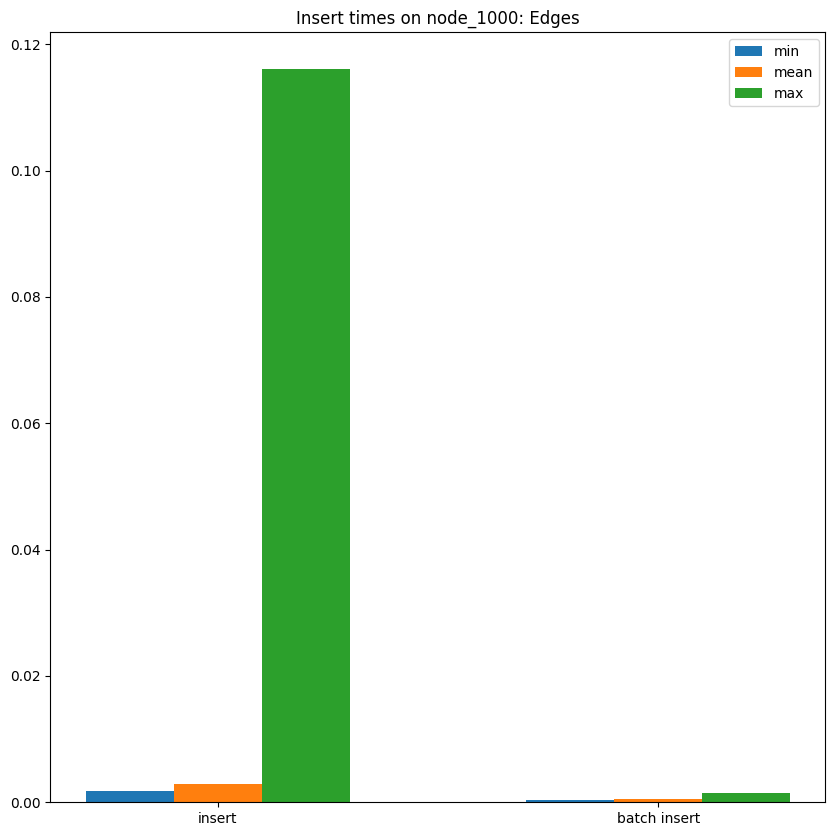

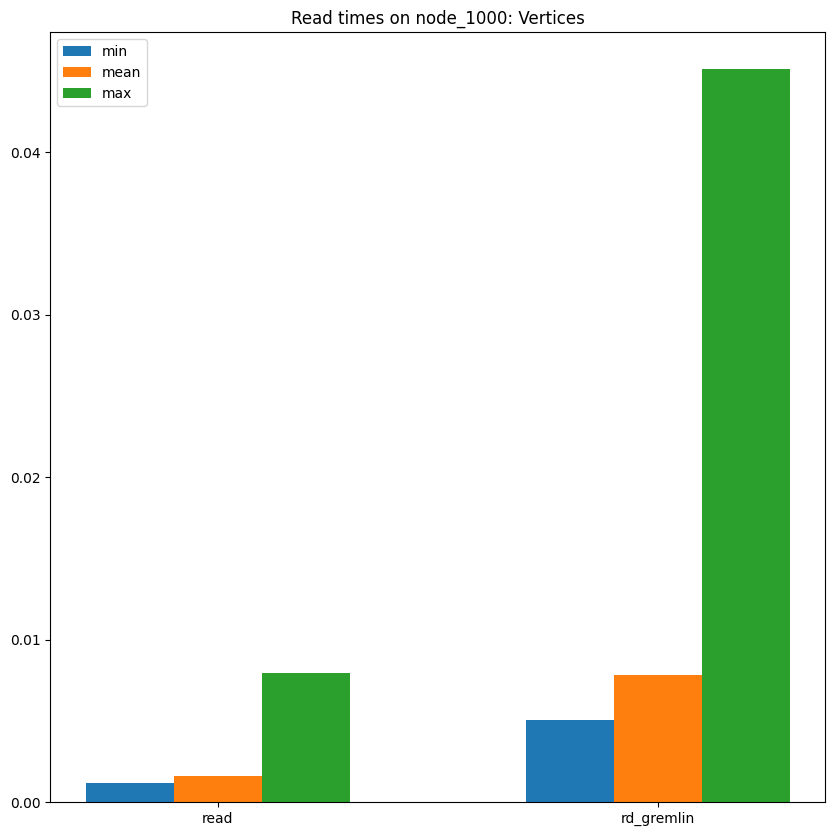

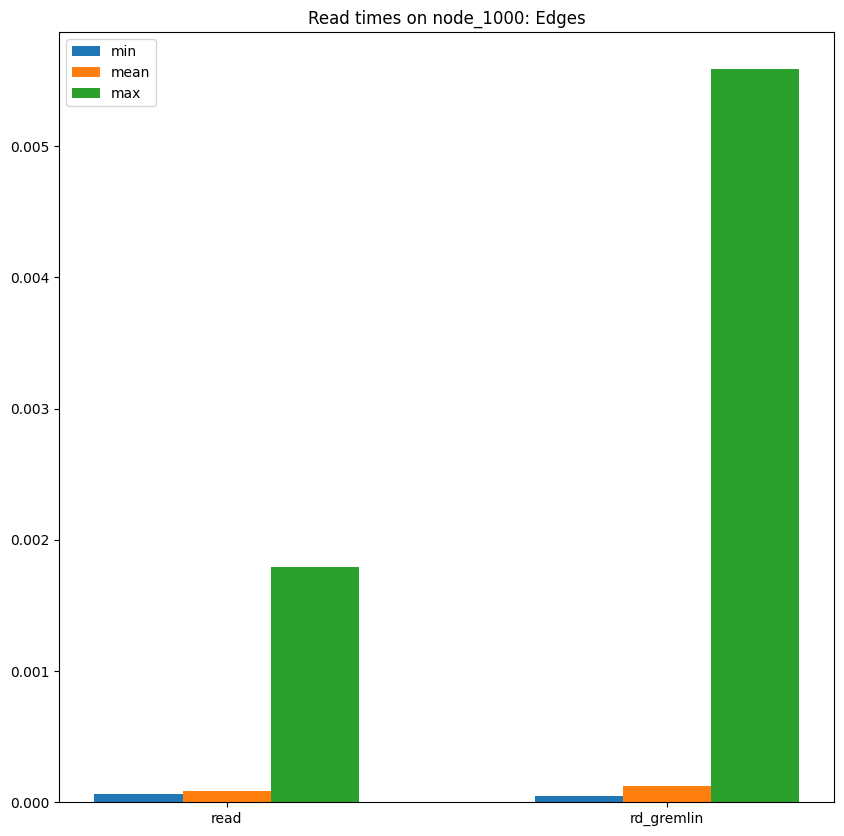

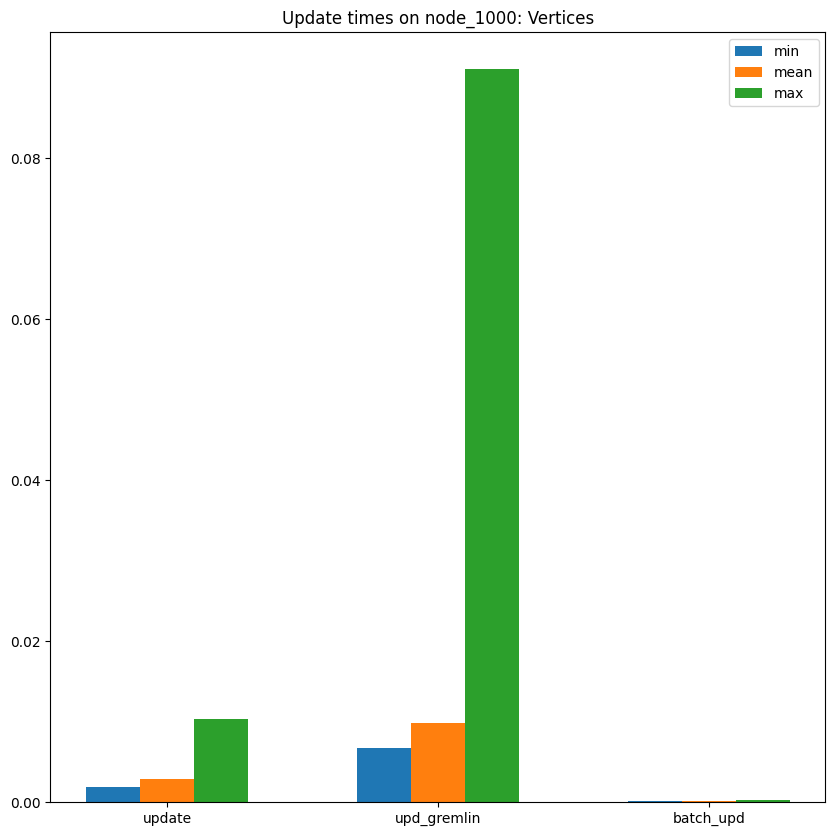

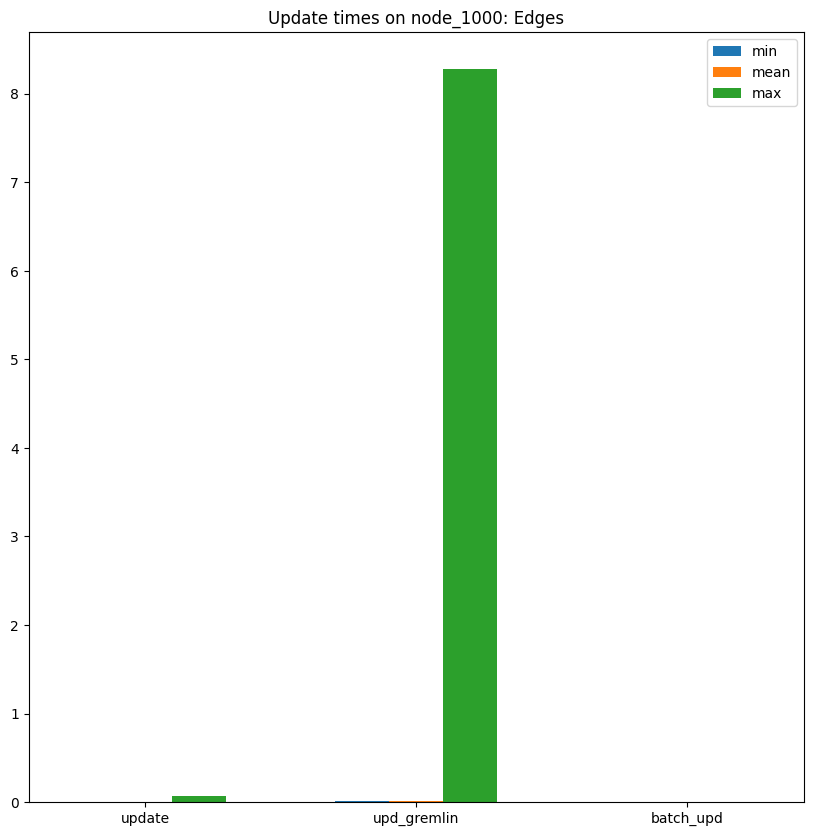

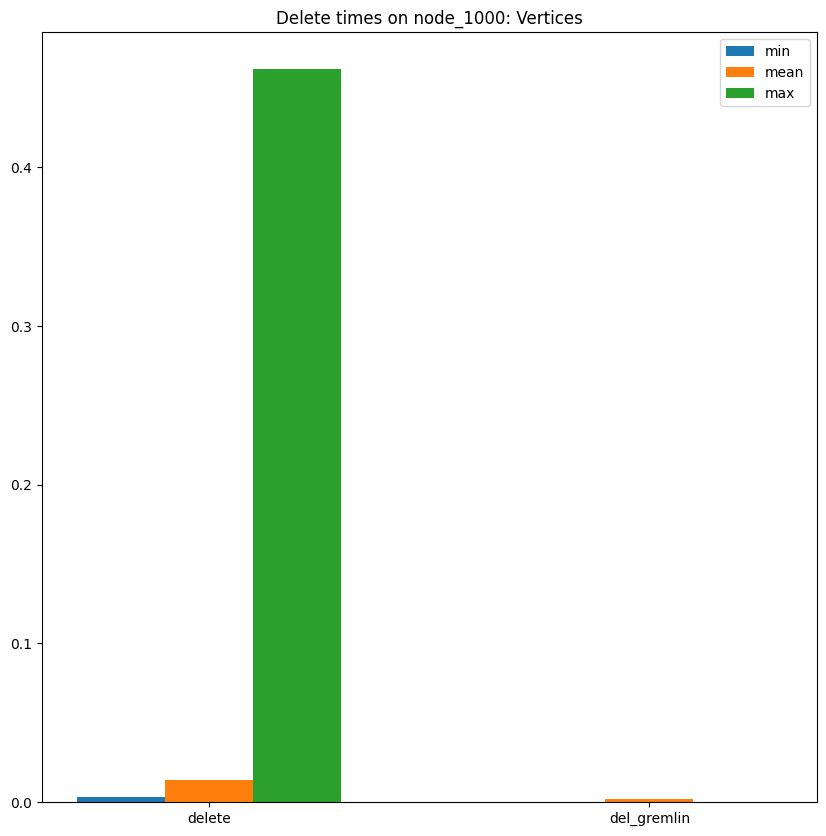

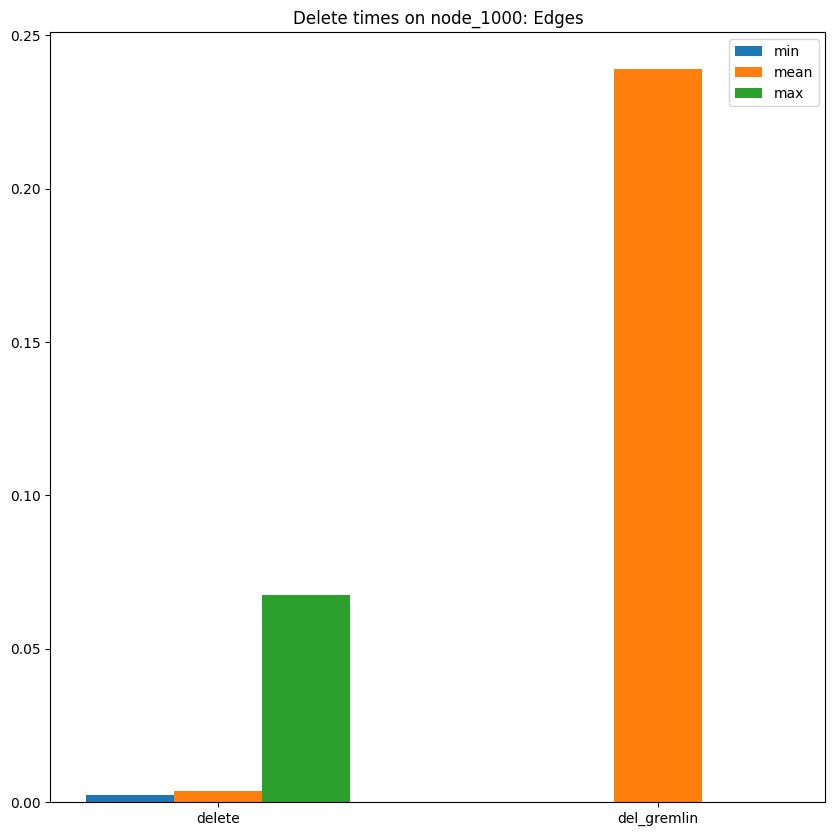

In [5]:
results = {}
large = False
for db in databases:
    if db == "node_10000":
        large = True
    results[db] = execute_database(db, large)

In [7]:
results

{'node_10': {'insert': {'vertices': {'mean': 0.002852463722229004,
    'max': 0.004044055938720703,
    'min': 0.0020825862884521484,
    'number_of_vertices': 10},
   'edges': {'mean': 0.0029212156931559246,
    'max': 0.00680088996887207,
    'min': 0.002075672149658203,
    'number_of_edges': 60},
   'total_time': 0.20430517196655273},
  'update': {'edges': {'mean': 0.003345354398091634,
    'max': 0.008148431777954102,
    'min': 0.002608776092529297,
    'total_time': 0.2288200855255127},
   'vertices': {'mean': 0.0020617246627807617,
    'max': 0.0025250911712646484,
    'min': 0.0017611980438232422,
    'total_time': 0.020689010620117188}},
  'update_gremlin': {'edges': {'edges_updated': 60,
    'min': 0.003414154052734375,
    'max': 0.016986608505249023,
    'mean': 0.00644683837890625,
    'total_time': 0.41745615005493164},
   'vertices': {'min': 0.0059261322021484375,
    'max': 0.010348081588745117,
    'mean': 0.006916546821594238,
    'total_time': 0.06925272941589355}},